In [1]:
import numpy as np
import h5py

with h5py.File('/data/users/kyle/Mishas_Data/M83_h5/M83_real.h5', 'r') as f:
    data_abs = f['rawdata']
    keys_abs = (list(data_abs.keys()))
    x_real = np.empty([1100000,84])
    
    for i,n in enumerate(keys_abs):
        temp = data_abs.get(n)
        x_real[:,i] = np.asarray(temp).flatten()


In [2]:
import numpy as np
import h5py

with h5py.File('/data/users/kyle/Mishas_Data/M83_h5/M83_imag.h5', 'r') as f:
    data_abs = f['rawdata']
    keys_abs = (list(data_abs.keys()))
    x_imag = np.empty([1100000,84])
    
    for i,n in enumerate(keys_abs):
        temp = data_abs.get(n)
        x_imag[:,i] = np.asarray(temp).flatten()


In [12]:
flagged_M83 = np.empty([1100000,84])

# Performing GMM on a single baseline

In [4]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, covariance_type = 'spherical', verbose=1)
gmm.fit(x_real[:,0].reshape(-1, 1))
real = gmm.predict(x_real[:,0].reshape(-1, 1))
gmm.fit(x_imag[:,0].reshape(-1, 1))
imag = gmm.predict(x_imag[:,0].reshape(-1, 1))

Initialization 0
  Iteration 0
  Iteration 10
Initialization converged: True
Initialization 0
  Iteration 0
  Iteration 10
Initialization converged: True


In [5]:
real_i = np.invert(real == 0)
imag_i = np.invert(imag == 0)

In [7]:
add = np.logical_or(real_i,imag_i)


# Performing GMM over entire array

In [13]:
from sklearn.mixture import GaussianMixture
import pickle
gmm = GaussianMixture(n_components=3, covariance_type = 'spherical', verbose=1)
for i in range(0,84):
    gmm.fit(x_real[:,i].reshape(-1, 1))
    real = gmm.predict(x_real[:,i].reshape(-1, 1))
    gmm.fit(x_imag[:,i].reshape(-1, 1))
    imag = gmm.predict(x_imag[:,i].reshape(-1, 1))
    
    real_i = np.invert(real == 0)
    imag_i = np.invert(imag == 0)
    
    add = np.logical_or(real_i,imag_i)
    flagged_M83[:,i] = add
# gmm.fit(x_abs)
# predict the cluster for each data point
# labels = gmm.predict(Y)


Initialization 0
  Iteration 0
  Iteration 10
Initialization converged: True
Initialization 0
  Iteration 0
  Iteration 10
Initialization converged: True
Initialization 0
  Iteration 0
  Iteration 10
Initialization converged: True
Initialization 0
  Iteration 0
  Iteration 10
Initialization converged: True
Initialization 0
  Iteration 0
  Iteration 10
Initialization converged: True
Initialization 0
  Iteration 0
  Iteration 10
Initialization converged: True
Initialization 0
  Iteration 0
  Iteration 10
Initialization converged: True
Initialization 0
  Iteration 0
  Iteration 10
Initialization converged: True
Initialization 0
  Iteration 0
  Iteration 10
  Iteration 20
Initialization converged: True
Initialization 0
  Iteration 0
  Iteration 10
Initialization converged: True
Initialization 0
  Iteration 0
  Iteration 10
Initialization converged: True
Initialization 0
  Iteration 0
  Iteration 10
Initialization converged: True
Initialization 0
  Iteration 0
  Iteration 10
Initialization 

In [14]:
from numpy import genfromtxt
com = genfromtxt('/data/users/kyle/Mishas_Data/Specs/com.csv', delimiter=',')
A1 = genfromtxt('/data/users/kyle/Mishas_Data/Specs/A1.csv', delimiter=',')
A2 = genfromtxt('/data/users/kyle/Mishas_Data/Specs/A2.csv', delimiter=',')


In [15]:
import h5py
counter = 0
with h5py.File('/data/users/kyle/Mishas_Data/M83_h5/M83_GMM_flagged_all.h5', 'w') as f:
    grp = f.create_group("rawdata")
    for i in range (0,21):
        for j in range (0,4):
            name = str(com[i][0])+ '_'+str(com[i][1])+'_'+str(j)
            grp.create_dataset(name, data =flagged_M83[:,counter])
            counter = counter +1

# Visualising the differences between the flags of complex data

Text(0.5,1,'OR Flags')

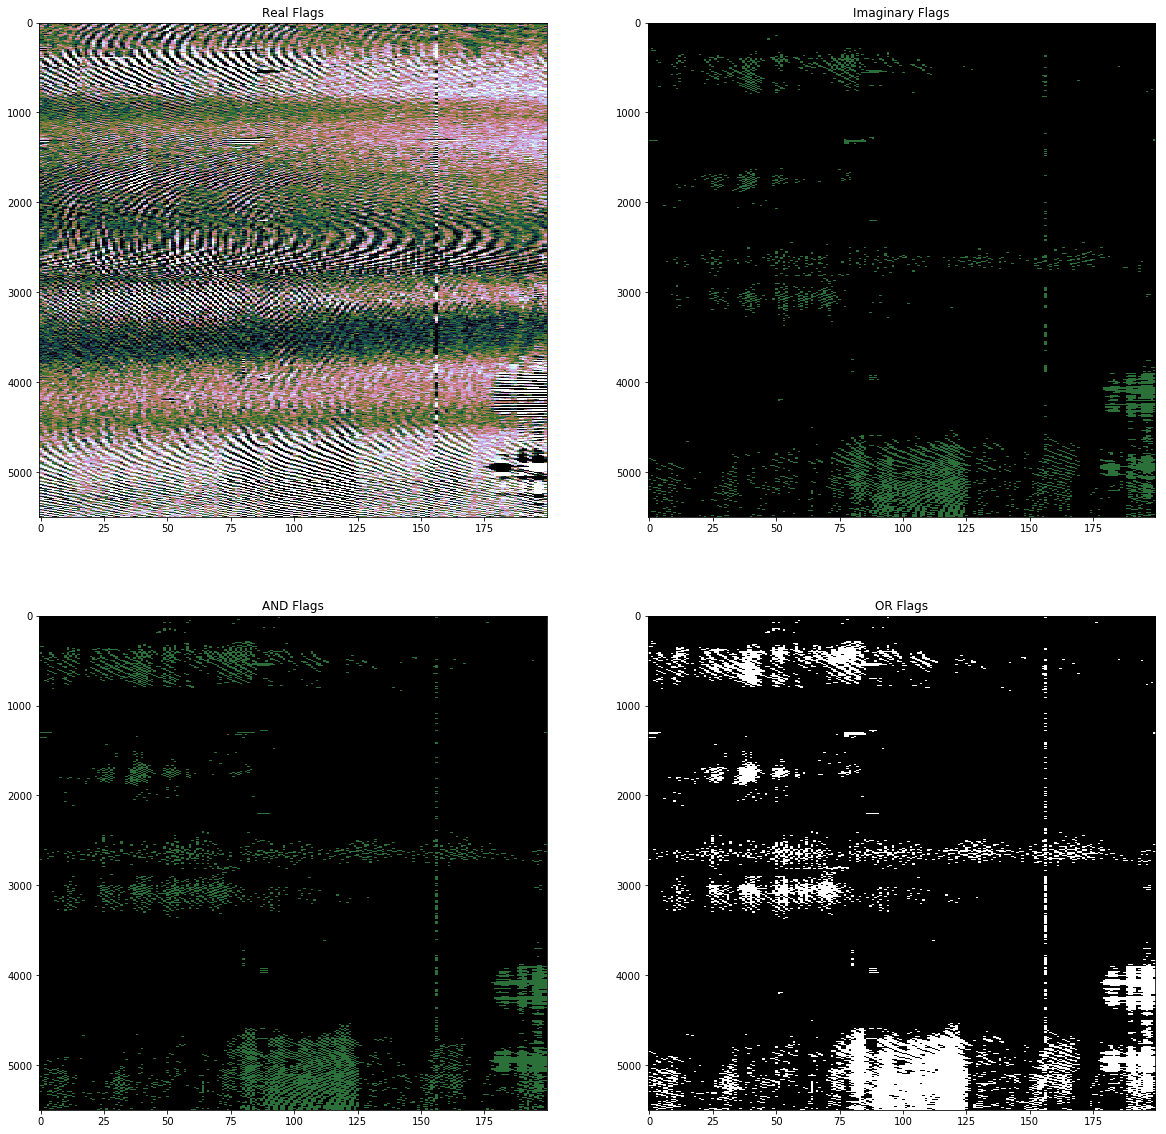

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,20))

palette = plt.cm.cubehelix

ax1 = fig.add_subplot(221)
im = ax1.imshow(x_real[:,0].reshape(5500,200), 
                aspect='auto',
                vmax=3,
                vmin=0,
                cmap=palette,
               )
ax1.set_title("Real Flags")

ax2 = fig.add_subplot(222)
im = ax2.imshow(real_i.reshape(5500,200), 
                aspect='auto',
                 vmax=3,
                vmin=0,
                cmap=palette,
               )
ax2.set_title("Imaginary Flags")

ax3 = fig.add_subplot(223)
im = ax3.imshow(imag_i.reshape(5500,200), 
                aspect='auto',
                cmap=palette,
                vmax=3,
                vmin=0
               )
ax3.set_title("AND Flags")

ax4 = fig.add_subplot(224)
im = ax4.imshow(add.reshape(5500,200), 
                 aspect='auto',
                cmap=palette,
               )
ax4.set_title("OR Flags")


In [72]:
fig.savefig('/users/kyle/images/foo.png', bbox_inches='tight')
